In [ ]:
!pip install xgboost==2.0.2

import matplotlib.pyplot as plt
%matplotlib inline

import os 

from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error, mean_squared_error, confusion_matrix, f1_score, recall_score, precision_score
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

from xgboost import XGBRegressor

from sklearn.pipeline import Pipeline


# suppress all warnings
import warnings
warnings.filterwarnings("ignore")


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
nationalILI = pd.read_csv('ILINet.csv', header=1)
nationalILI.head()

,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,National,X,1997,40,1.10148,1.21686,179,X,157,205,X,29,570,192,46842
1,National,X,1997,41,1.20007,1.28064,199,X,151,242,X,23,615,191,48023
2,National,X,1997,42,1.37876,1.23906,228,X,153,266,X,34,681,219,54961
3,National,X,1997,43,1.19920,1.14473,188,X,193,236,X,36,653,213,57044
4,National,X,1997,44,1.65618,1.26112,217,X,162,280,X,41,700,213,55506


In [ ]:
nationalILI.drop(columns=['REGION','REGION TYPE','AGE 0-4', 'AGE 25-49', 'AGE 25-64', 'AGE 5-24',
       'AGE 50-64', 'AGE 65'], inplace=True)

In [ ]:
nationalILI_new = pd.read_csv('ILINet_new.csv', header=1)
nationalILI_new.head()
nationalILI_new.drop(columns=['REGION','REGION TYPE','AGE 0-4', 'AGE 25-49', 'AGE 25-64', 'AGE 5-24',
       'AGE 50-64', 'AGE 65'], inplace=True)

In [ ]:
nationalILI_new

,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,2022,40,2.61928,2.59379,57318,3684,2209814
1,2022,41,2.97342,2.85133,63388,3720,2223106
2,2022,42,3.33747,3.31688,75615,3726,2279700
3,2022,43,4.40914,4.44660,109496,3788,2462467
4,2022,44,5.46044,5.54702,139247,3776,2510305
5,2022,45,5.77391,5.67263,140055,3793,2468962
6,2022,46,5.95367,5.73531,137419,3777,2396019
7,2022,47,7.46674,7.37142,164936,3765,2237505
8,2022,48,7.22916,7.24012,185673,3767,2564503
9,2022,49,6.83803,6.82928,167248,3750,2448985


In [ ]:
preCOVIDNational = nationalILI[((nationalILI['YEAR'] <= 2018) | ((nationalILI['YEAR'] == 2019) & (nationalILI['WEEK'] < 40))) & ((nationalILI['YEAR'] >= 2003) | ((nationalILI['YEAR'] == 2002) & (nationalILI['WEEK'] >= 40))) ]
postCOVIDNational = nationalILI[((nationalILI['YEAR'] == 2019) & (nationalILI['WEEK'] >= 40)) | (nationalILI['YEAR'] >= 2020) & ((nationalILI['YEAR'] < 2022) | ((nationalILI['YEAR'] == 2022) & (nationalILI['WEEK'] < 46)))]

pre2022National = nationalILI[((nationalILI['YEAR'] < 2022) | ((nationalILI['YEAR'] == 2022) & (nationalILI['WEEK'] < 46))) & ((nationalILI['YEAR'] >= 2003) | ((nationalILI['YEAR'] == 2002) & (nationalILI['WEEK'] >= 40))) ]
post2017National = nationalILI[((nationalILI['YEAR'] == 2017) & (nationalILI['WEEK'] >= 40)) | (nationalILI['YEAR'] >= 2018) & ((nationalILI['YEAR'] < 2022) | ((nationalILI['YEAR'] == 2022) & (nationalILI['WEEK'] < 40)))]

testYear2022_2023 = nationalILI[((nationalILI['YEAR'] == 2022) & (nationalILI['WEEK'] >= 40)) | ((nationalILI['YEAR'] == 2023) & (nationalILI['WEEK'] < 40))]
testYear2021_2022 = nationalILI[((nationalILI['YEAR'] == 2021) & (nationalILI['WEEK'] >= 40)) | ((nationalILI['YEAR'] == 2022) & (nationalILI['WEEK'] < 40))]
testYear2021_2022.reset_index(inplace=True, drop=True)
full2019_2023 = nationalILI[((nationalILI['YEAR'] == 2019) & (nationalILI['WEEK'] >= 40)) | (nationalILI['YEAR'] >= 2020) | ((nationalILI['YEAR'] == 2023) & (nationalILI['WEEK'] < 46))]

new2023 = nationalILI_new[((nationalILI_new['YEAR'] == 2023) & (nationalILI_new['WEEK'] >= 40))]
new2023.reset_index(inplace=True, drop=True)

train_2013_2016 = nationalILI[((nationalILI['YEAR'] <= 2015) | ((nationalILI['YEAR'] == 2016) & (nationalILI['WEEK'] < 40))) & ((nationalILI['YEAR'] >= 2014) | ((nationalILI['YEAR'] == 2013) & (nationalILI['WEEK'] >= 40))) ]
test_2016_2017 = nationalILI[((nationalILI['YEAR'] == 2016) & (nationalILI['WEEK'] >= 40)) | ((nationalILI['YEAR'] == 2017) & (nationalILI['WEEK'] < 40))]
test_year_2015_2016 = nationalILI[((nationalILI['YEAR'] == 2015) & (nationalILI['WEEK'] >= 40)) | ((nationalILI['YEAR'] == 2016) & (nationalILI['WEEK'] < 40))]
test_year_2015_2016.reset_index(inplace=True, drop=True)



In [ ]:
full2019_2023



,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
1148,2019,40,1.49064,1.50415,21915,2896,1456967
1149,2019,41,1.59269,1.59823,22953,2924,1436150
1150,2019,42,1.72517,1.73838,24857,2950,1429897
1151,2019,43,1.83428,1.86050,27419,2980,1473740
1152,2019,44,2.04049,2.01425,28910,2989,1435277
...,...,...,...,...,...,...,...
1358,2023,41,2.29191,2.29444,56896,4111,2479729
1359,2023,42,2.50619,2.49517,61850,4096,2478788
1360,2023,43,2.69580,2.65943,66922,4111,2516401
1361,2023,44,2.96143,2.92928,71117,4047,2427801


In [ ]:
models = [
    # ("SVR", SVR(C = 0.1)),
    ("Decision Tree Regression", DecisionTreeRegressor()),
    ("Random Forest Regression", RandomForestRegressor( n_estimators=150)), 
    ("Random Forest Regression3", RandomForestRegressor( n_estimators=300)), 
    ("Random Forest Regression2", RandomForestRegressor(min_samples_split = 3,  n_estimators=75)), 
    ("Gradient Boosting Regression", GradientBoostingRegressor(loss='squared_error', n_estimators=500, max_depth=5, learning_rate=0.01)),
    ("Gradient Boosting Regression4", GradientBoostingRegressor(loss='squared_error', n_estimators=300, max_depth=5, learning_rate=0.012)),
    ("Gradient Boosting Regression5", GradientBoostingRegressor(loss='squared_error', n_estimators=700, max_depth=4, learning_rate=0.001)),
    ("Gradient Boosting Regression2", GradientBoostingRegressor(loss='squared_error', n_estimators=300, max_depth=5, learning_rate=0.05)),
    ("Gradient Boosting Regression3", GradientBoostingRegressor(loss='huber', n_estimators=375, max_depth=3, learning_rate=0.02, random_state=0, max_features=2, alpha=0.95)),
    ('xgb', XGBRegressor()),
    ("K-Nearest Neighbors Regression", KNeighborsRegressor()),
    ("K-Nearest Neighbors Regression2", KNeighborsRegressor(n_neighbors=7, weights='distance')), 
    ("K-Nearest Neighbors Regression3", KNeighborsRegressor(n_neighbors=3))
]

In [ ]:
data_pre2022 = pre2022National[['YEAR', 'WEEK']]
target_pre2022 = pre2022National['% WEIGHTED ILI']
data_pre2022.reset_index(inplace=True, drop=True)

data_post2017 = post2017National[['YEAR', 'WEEK']]
target_post2017 = post2017National['% WEIGHTED ILI']
data_post2017.reset_index(inplace=True, drop=True)

data_post_covid = postCOVIDNational[['YEAR', 'WEEK']]
target_post_covid = postCOVIDNational['% WEIGHTED ILI']
data_post_covid.reset_index(inplace=True, drop=True)

data_test_2023 = testYear2022_2023[['YEAR', 'WEEK']]
target_test_2023 = testYear2022_2023['% WEIGHTED ILI']
data_test_2023.reset_index(inplace=True, drop=True)

data_national = preCOVIDNational[['YEAR', 'WEEK']]
target_national = preCOVIDNational['% WEIGHTED ILI']
data_national.reset_index(inplace=True, drop=True)

data_full2019_2023 = full2019_2023[['YEAR', 'WEEK']]
target_full2019_2023 = full2019_2023['% WEIGHTED ILI']
data_full2019_2023.reset_index(inplace=True, drop=True)


In [ ]:
data_test_2024 = data_test_2023.copy()
data_test_2024['YEAR'] = data_test_2023['YEAR'].apply(lambda x: 2023 if x == 2022 else 2024)
# data_test_2024
target_test_2024 = new2023['% WEIGHTED ILI']


In [ ]:
def best_model(train_data, train_target, test_data, test_target, models):
    bestrmse = 1000000
    rmse_scores = []
    for model in models:
    

        modelName = model[0]
        print(model[0])
        model = model[1]
        model.fit(train_data ,train_target)
        test_pred = model.predict(val_data)

        rmse = np.sqrt(mean_squared_error(val_target, test_pred))
        mae = mean_absolute_error(val_target, test_pred)
        print('rmse:', rmse)
        print('mae:', mae)
        if rmse < bestrmse:
            bestrmse = rmse
            print(bestrmse, 'best', modelName)
            best_model = model
        rmse_scores.append(bestrmse)
    print(rmse_scores)
    return best_model

In [ ]:
# make function for this
val_data = data_test_2023
val_target = target_test_2023
# train_data = data_post_covid
# train_data = data_national # this is 2002-2019
train_data = data_post2017
# train_data = data_pre2022
# train_target = target_post_covid
bestrmse = 1000000
rmse_scores = []
train_target = target_post2017
# train_target = target_pre2022
# train_target = target_national
for model in models:
    

    modelName = model[0]
    print(model[0])
    model = model[1]
    model.fit(train_data ,train_target)
    test_pred = model.predict(val_data)

    #test_pred = model.predict(valX_prepared)
    rmse = np.sqrt(mean_squared_error(val_target, test_pred))
    print(rmse)
    if rmse < bestrmse:
        bestrmse = rmse
        print(bestrmse, 'best', modelName)
        bestmodel1 = model
    rmse_scores.append(bestrmse)
print(rmse_scores)

Decision Tree Regression
1.5741040993353113
1.5741040993353113 best Decision Tree Regression
Random Forest Regression
1.6046138848863638
Random Forest Regression3
1.5961105476248127
Random Forest Regression2
1.5964145169615473
Gradient Boosting Regression
1.628779620095578
Gradient Boosting Regression4
1.6303098969009784
Gradient Boosting Regression5
1.7620458932003171
Gradient Boosting Regression2
1.540781135472471
1.540781135472471 best Gradient Boosting Regression2
Gradient Boosting Regression3
1.5082612840257388
1.5082612840257388 best Gradient Boosting Regression3
xgb
1.5482405607141236
K-Nearest Neighbors Regression
1.797674934641317
K-Nearest Neighbors Regression2
1.787816356053407
K-Nearest Neighbors Regression3
1.6125612687415323
[1.5741040993353113, 1.5741040993353113, 1.5741040993353113, 1.5741040993353113, 1.5741040993353113, 1.5741040993353113, 1.5741040993353113, 1.540781135472471, 1.5082612840257388, 1.5082612840257388, 1.5082612840257388, 1.5082612840257388, 1.508261284

In [ ]:
def gridSearchModel(X_train, y_train):
    gb_model = GradientBoostingRegressor()
    xgb_model = XGBRegressor()

    # Define the parameter grid for hyperparameter tuning
    param_grid = { # use this for Gradient Boost
        'n_estimators': [150, 300, 400, 500, 600, 650, 700], 
        # 'n_estimators': [150, 300, 400], 
        'max_depth': [3, 4, 5, 6, 7],           
        'learning_rate': [0.015, 0.025, 0.05, 0.075, 0.1, .15, .2, .25, .5],

        # 'learning_rate': [0.015, 0.025, 0.05, 0.075],
    }

    
    param_grid = { # use this for XGBoost
        'min_child_weight': [1, 5, 10],
        'gamma': [0,  0.05, 0.1, 0.5,1],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [ 4, 5, 6, 7],
        'learning_rate': [0.015, 0.025, 0.05, 0.075, .1]
    }


    # Create the GridSearchCV object
    grid_search = GridSearchCV(estimator= xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error',
                                verbose=1, n_jobs=-1, cv=[(slice(None), slice(None))])

    # Fit the GridSearchCV object to the data
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters and corresponding MSE
    print("Best Hyperparameters:", grid_search.best_params_)
    print("Best Mean Squared Error:", -grid_search.best_score_)

    # Access the best model directly
    best_gb_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # If you want to cross-validate the best model on the entire dataset, you can use cross_val_score
    # This can be helpful to get a sense of the model's performance on the entire dataset
    # cv_results = cross_val_score(best_gb_model, X_train, y_train, scoring='neg_mean_squared_error')
    # print("Cross-validated Mean Squared Error on the entire dataset:", np.mean(-cv_results))
    return best_gb_model, best_params

In [ ]:

import matplotlib.pyplot as plt
baseline = testYear2021_2022['% WEIGHTED ILI']

def preds_and_graph(best_model_X, pred_data, pred_target, baseline, title):
    test_pred = best_model_X.predict(pred_data)

    if len(pred_target) >= 50:
        baseline_rmse = np.sqrt(mean_squared_error(pred_target, baseline))
        rmse = np.sqrt(mean_squared_error(pred_target, test_pred))
        mae = mean_absolute_error(val_target, test_pred)
        baseline_mae = mean_absolute_error(val_target, baseline)
        print('rmse:', rmse)
        print('mae:', mae)
        print('baseline mae:', baseline_mae)
        print('baseline rmse:', baseline_rmse)
        plt.plot(baseline, 'g:', label='Baseline')
        plt.plot(test_pred, 'm', label='Model Predictions')
        plt.plot(np.array(pred_target),'b--', label='2022-2023 data')
       

        plt.title(title)
        plt.ylabel('% Weighted ILI')
        plt.xlabel('2022 Week 40 -  2023 Week 40')


        plt.legend()
        plt.show()
    else:
        target_test_2023.reset_index(inplace=True, drop=True)
        plt.plot(baseline, 'g:', label='Baseline')
        plt.plot(test_pred, 'm', label='Model Predictions')
        plt.plot(target_test_2023, 'y-.', label = '2022-2023 data')
        plt.plot(np.array(pred_target),'b--', label='2023-2024 data')
        plt.title(title)
        plt.ylabel('% Weighted ILI')
        plt.xlabel('2023 Week 40 -  2024 Week 40')
        plt.legend()
        plt.show()

Fitting 1 folds for each of 2700 candidates, totalling 2700 fits
Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.8}
Best Mean Squared Error: 0.0030935393209968664
rmse: 1.9538502343997675
mae: 1.418892603900616
baseline mae: 1.019148076923077
baseline rmse: 1.605264015009561


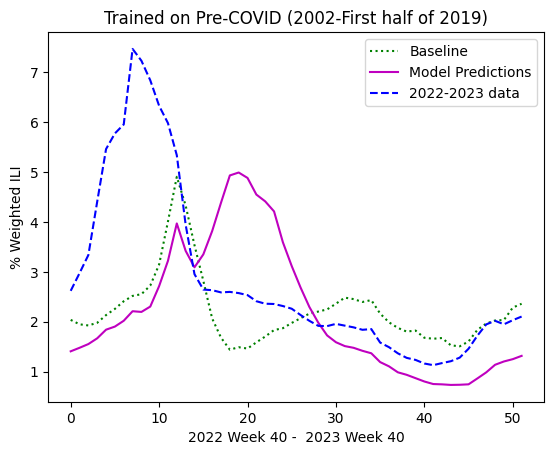

In [ ]:
pre_covid_m2, pre_covid_params = gridSearchModel(data_national, target_national)
preds_and_graph(pre_covid_m2, data_test_2023, target_test_2023, baseline, 'Trained on Pre-COVID (2002-First half of 2019)')

Fitting 1 folds for each of 2700 candidates, totalling 2700 fits
Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.8}
Best Mean Squared Error: 0.005315483113235192
rmse: 0.7101013869245596
mae: 0.5252420476744726
baseline mae: 1.019148076923077
baseline rmse: 1.605264015009561


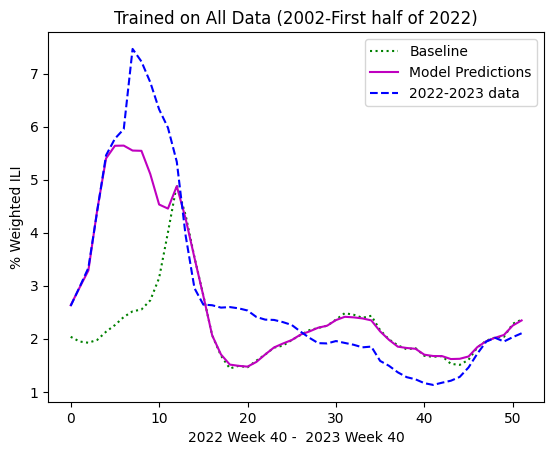

In [ ]:
# best_model_all_data = best_model(data_pre2022, target_pre2022, data_test_2023, target_test_2023, models)
best_model_all_data, best_params_all_data = gridSearchModel(data_pre2022, target_pre2022)
# new_fit_all = GradientBoostingRegressor(**best_params_all_data).fit(data_pre2022, target_pre2022)
preds_and_graph(best_model_all_data, data_test_2023, target_test_2023, baseline, 'Trained on All Data (2002-First half of 2022)')

Fitting 1 folds for each of 2700 candidates, totalling 2700 fits
Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.8}
Best Mean Squared Error: 0.00044470560741373746
rmse: 0.5969081918609939
mae: 0.4589652989013379
baseline mae: 1.019148076923077
baseline rmse: 1.605264015009561


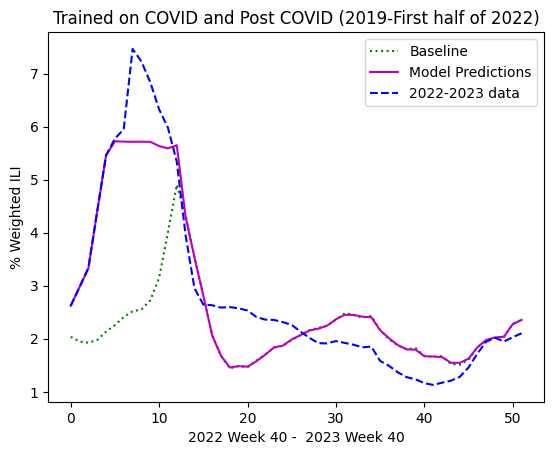

In [ ]:
# best_model_post_covid = best_model(data_post_covid, target_post_covid, data_test_2023, target_test_2023, models)
best_model_post_covid, best_params_post_cov = gridSearchModel(data_post_covid, target_post_covid)
# new_fit_post = GradientBoostingRegressor(**best_params_post_cov).fit(data_post_covid, target_post_covid)
preds_and_graph(best_model_post_covid, data_test_2023, target_test_2023, baseline, 'Trained on COVID and Post COVID (2019-First half of 2022)')

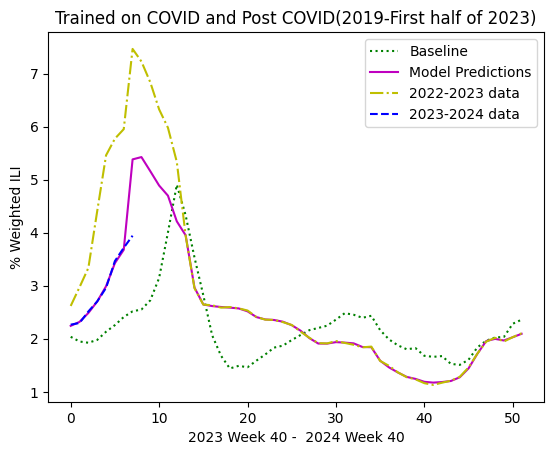

In [ ]:
#best_model_full_2023, best_params_full_2023 = gridSearchModel(data_full2019_2023, target_full2019_2023)
# gb_model = GradientBoostingRegressor(**best_params_post_cov)
xgb_model =  XGBRegressor(**best_params_post_cov)

best_model_full_2023 = xgb_model.fit(data_full2019_2023, target_full2019_2023)
preds_and_graph(best_model_full_2023, data_test_2024, target_test_2024, baseline, 'Trained on COVID and Post COVID(2019-First half of 2023)')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c7e7b740-ad7d-41a8-9704-cb0c6a8385eb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>